# Rating Wine Quality 

## Exploratory Data Analysis , Modeling, Accuracy

### This project is a classification problem. It involves rating wine as either 'great' ( quality >= 7) or 'so-so' (quality < 7) . Two datasets were combined in for this project. The first dataset had 4898 rows and 12 features plus the target column. More information about the data can be found in the EDA.log file.
Both datasets used for this project was obtained from the [UCI machine learning repository](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/)

### Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

### Data import

##### Import First Dataset

In [4]:
data1_location = '../data/winequality-white.csv'
df1 = pd.read_csv(data1_location,sep=';')

##### View a sample of 5 rows in the first dataset

In [5]:
df1.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2735,6.5,0.35,0.28,12.4,0.051,86.0,213.0,0.99620,3.16,0.51,9.9,6
921,7.7,0.32,0.62,10.6,0.036,56.0,153.0,0.99780,3.13,0.44,8.9,6
2945,4.9,0.33,0.31,1.2,0.016,39.0,150.0,0.98713,3.33,0.59,14.0,8
3163,7.1,0.36,0.37,4.8,0.019,39.0,114.0,0.99036,3.08,0.49,12.7,7
1117,8.1,0.45,0.34,8.3,0.037,33.0,216.0,0.99760,3.31,0.64,9.7,5


In [6]:
df1.shape

(4898, 12)

##### Import Second Dataset

In [7]:
data2_location = '../data/winequality-red.csv'
df2 = pd.read_csv(data2_location,sep=';')

##### View a sample of 5 rows in the second dataset

In [8]:
df2.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
196,7.3,0.580,0.30,2.4,0.074,15.0,55.0,0.99680,3.46,0.59,10.2,5
368,10.3,0.340,0.52,2.8,0.159,15.0,75.0,0.99980,3.18,0.64,9.4,5
1060,11.6,0.230,0.57,1.8,0.074,3.0,8.0,0.99810,3.14,0.70,9.9,6
658,7.2,0.520,0.07,1.4,0.074,5.0,20.0,0.99730,3.32,0.81,9.6,6
1557,6.6,0.855,0.02,2.4,0.062,15.0,23.0,0.99627,3.54,0.60,11.0,6


In [9]:
df2.shape

(1599, 12)

### Data Exploration


#### Observation

It is observed that the first dataset has no null values, has 4898 rows and 12 features plus the target column

In [8]:
#get data information
print('Dataset 1 information:')
df1.info()

Dataset 1 information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [10]:
#Check for null values
print('Checking Null values in Dataset 1:')
df1.isnull().sum()

Checking Null values in Dataset 1:


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Observation

It is observed that the second dataset has no null values, has 1599 rows and 12 features plus the target column

In [9]:
#get data information
print('Dataset 2 information:')
df2.info()

Dataset 2 information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
#Check for null values
print('Checking Null values in Dataset 2:')
df2.isnull().sum()

Checking Null values in Dataset 2:


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

From the initial exploration, both datasets appears to have the same columns and data types, so i'll concatenate them into one dataframe

In [74]:
datasets = [df1,df2]
# New dataframe is df
df = pd.concat(datasets,ignore_index=True)

NameError: name 'df2' is not defined

In [5]:
#delete the separate datsets to conserve memory
del df1; del df2

### Explore combined data

##### Observation
The combined data has 6497 rows, no missing values and 12 features plus the target column.

In [19]:
print('Combined Data Information:')
df.info()

Combined Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [27]:
#Check for missing values
print('Count of missing values in each column in the Dataset:')
df.isnull().sum()

Count of missing values in each column in the Dataset:


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [21]:
#get statistics of numerical columns
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
#get data columns
columns = df.columns.to_list()

#### View data column names

In [24]:
print('Data columns:',columns)

Data columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [25]:
#see column data types
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

##### Observations
It is observed that the dataset has only numerical features

### Data Exploration
#### Columns data Distribution

In [37]:
def make_histogram(columns: list, df: pd.DataFrame = df):
    '''
        This function shows data distribution for each column in dataset using a histogram.
        columns : list of columns to make charts for in the dataframe
        df: dataframe
        
    '''
    cols = 2
    row = len(columns)//2+1
    plt.figure(figsize=(20,row*5))
    for col in columns:
        plt.subplot(row,cols,columns.index(col)+1)
        plt.title(col)
        plt.hist(df[col],bins=100)
    plt.show()

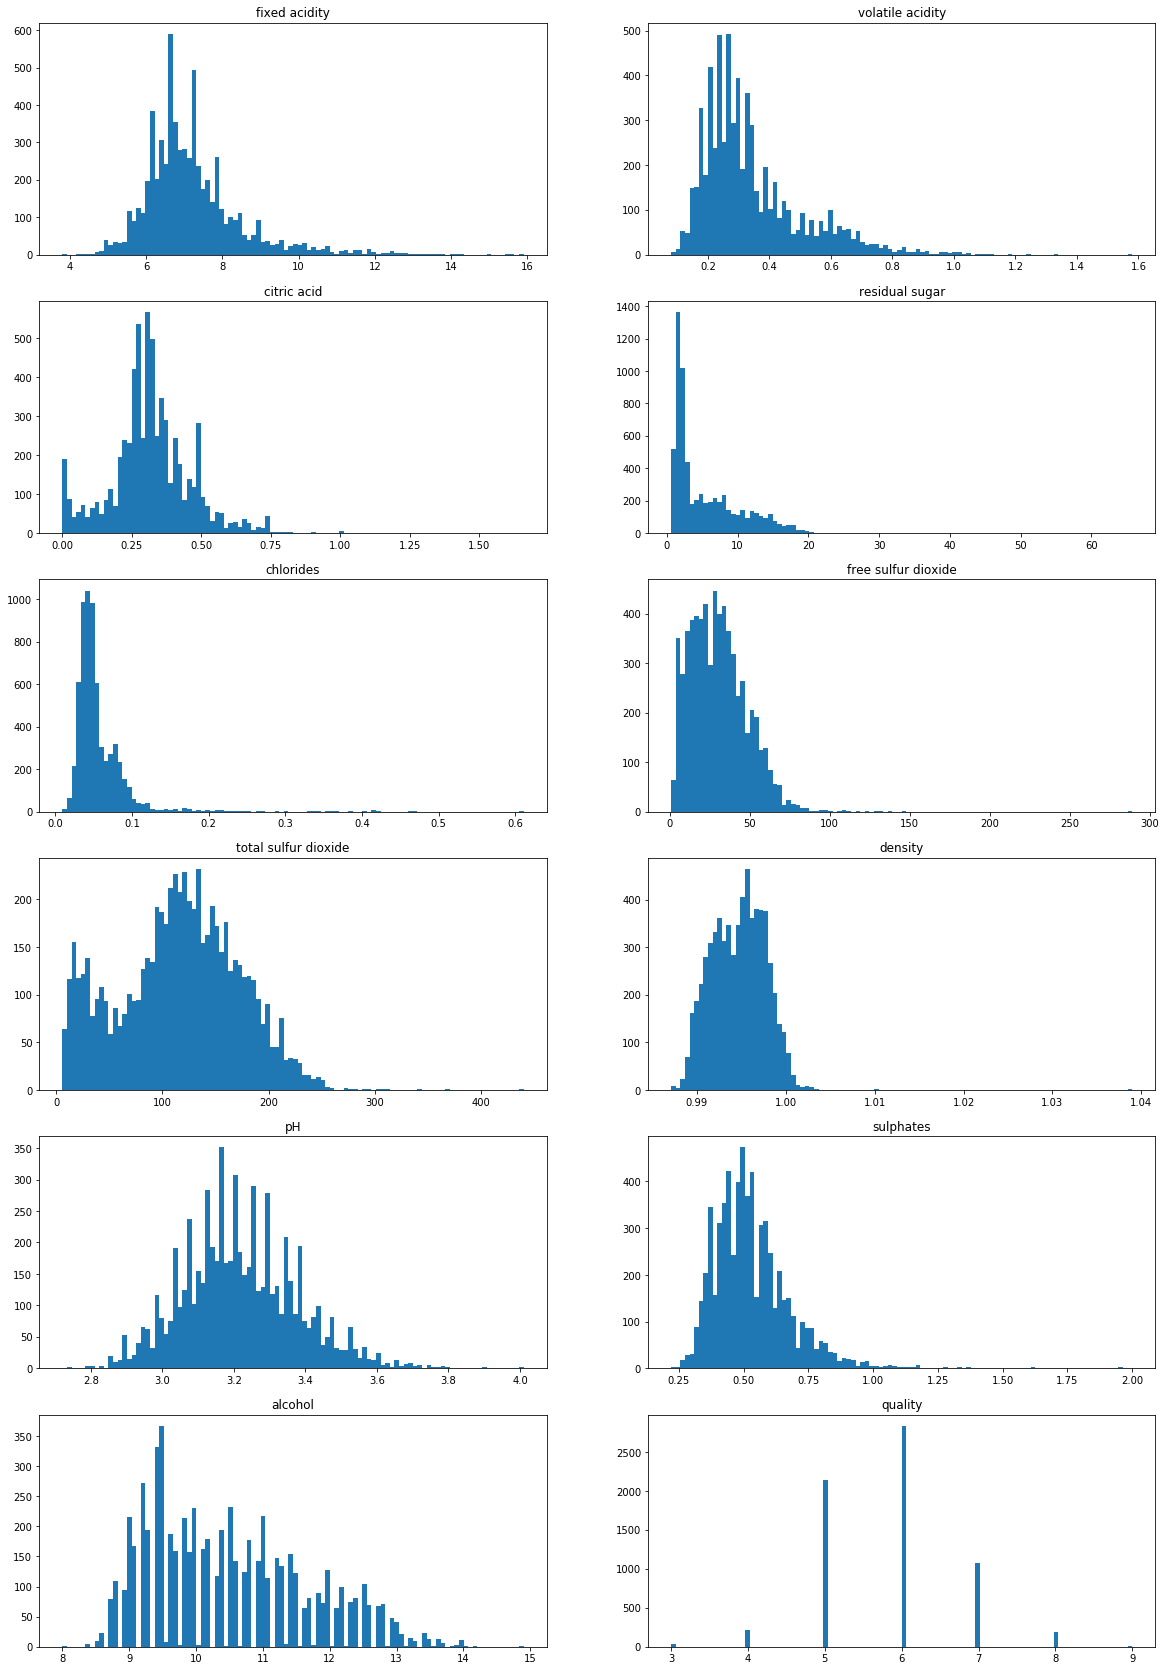

In [38]:
make_histogram(columns)

In [39]:
#check distribution of quality values
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

#### Observation 
- Some columns (fixed acidity, volatile acidity,citric acid, residual sugar,chlorides, free sulphur dioxide, total sulphur dioxide,density, sulphates) have right skewed distibution.

- Target column value distribution is not balanced.

- Some columns have high values so they can be normalized for optimizing model learning 

In [94]:
def show_outliers(features: list, df: pd.DataFrame = df):
    '''
        This function shows outliers for features in dataset using a box plot.
        features : list of feature column names to make box plots for in the dataframe
        df: dataframe
        
    '''
    cols = 2
    row = len(features)//2+1
    plt.figure(figsize=(20,row*5))
    for col in features:
        plt.subplot(row,cols,features.index(col)+1)
        plt.title(col)
        plt.boxplot(df[col])
    plt.show()

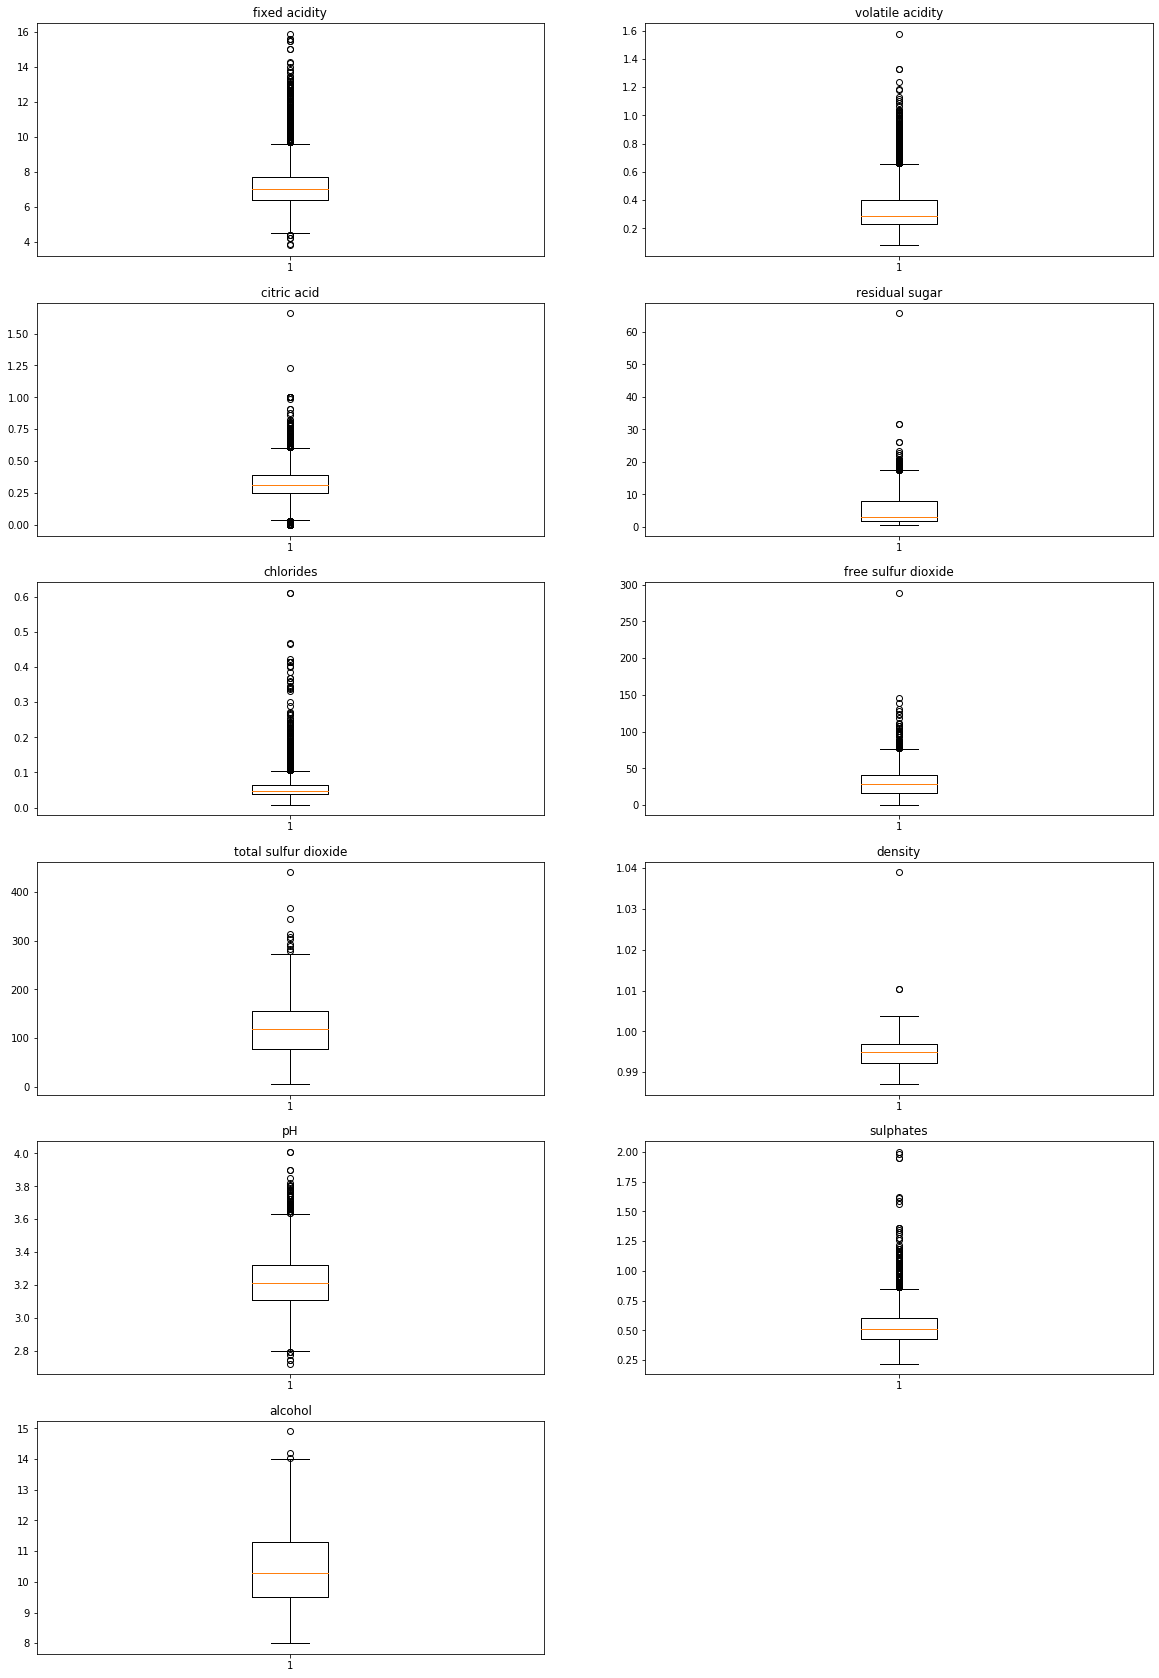

In [96]:
show_outliers(features)

#### Observation 
- Some columns have outliers so Z-score Normalization will be used, which is = (value-mean) / standard deviation

### Feature Engineering

#### Obtaining wine rating from quality value

- great (for quality >= 7) 1
- so-so (for quality < 7) 0

In [76]:
df['rating'] = df['quality'].apply(lambda x: 1 if x>=7 else 0)

In [8]:
#check distribution of rating 
df['rating'].value_counts()

0    5220
1    1277
Name: rating, dtype: int64

View 10 samples of the data 

In [42]:
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
6281,8.0,0.600,0.22,2.1,0.080,25.0,105.0,0.99613,3.30,0.49,9.9,5,0
3616,7.7,0.320,0.61,11.8,0.041,66.0,188.0,0.99794,3.00,0.54,9.3,5,0
2054,8.6,0.485,0.29,4.1,0.026,19.0,101.0,0.99180,3.01,0.38,12.4,5,0
6399,7.8,0.820,0.29,4.3,0.083,21.0,64.0,0.99642,3.16,0.53,9.4,5,0
4869,6.6,0.240,0.33,10.1,0.032,8.0,81.0,0.99626,3.19,0.51,9.8,6,0
6176,8.0,0.715,0.22,2.3,0.075,13.0,81.0,0.99688,3.24,0.54,9.5,6,0
1292,6.2,0.170,0.30,1.1,0.037,14.0,79.0,0.99300,3.50,0.54,10.3,6,0
5594,7.0,0.650,0.02,2.1,0.066,8.0,25.0,0.99720,3.47,0.67,9.5,6,0
3446,7.3,0.340,0.30,9.4,0.057,34.0,178.0,0.99554,3.15,0.44,10.4,6,0
3414,8.9,0.300,0.35,4.6,0.032,32.0,148.0,0.99458,3.15,0.45,11.5,7,1


#### Observation

The dataset target is imbalanced

### Check Correlation

I set the correlation threshold to 0.7, so if two columns have a correlation value >0.7 , one of the columns will be dropped. 

#### Observation 

Only 'free sulfur oxide' and 'total sulfur oxide' seem to have a high correlation (0.72).
Their redundancy can be confirmed by training models with either and both of them.

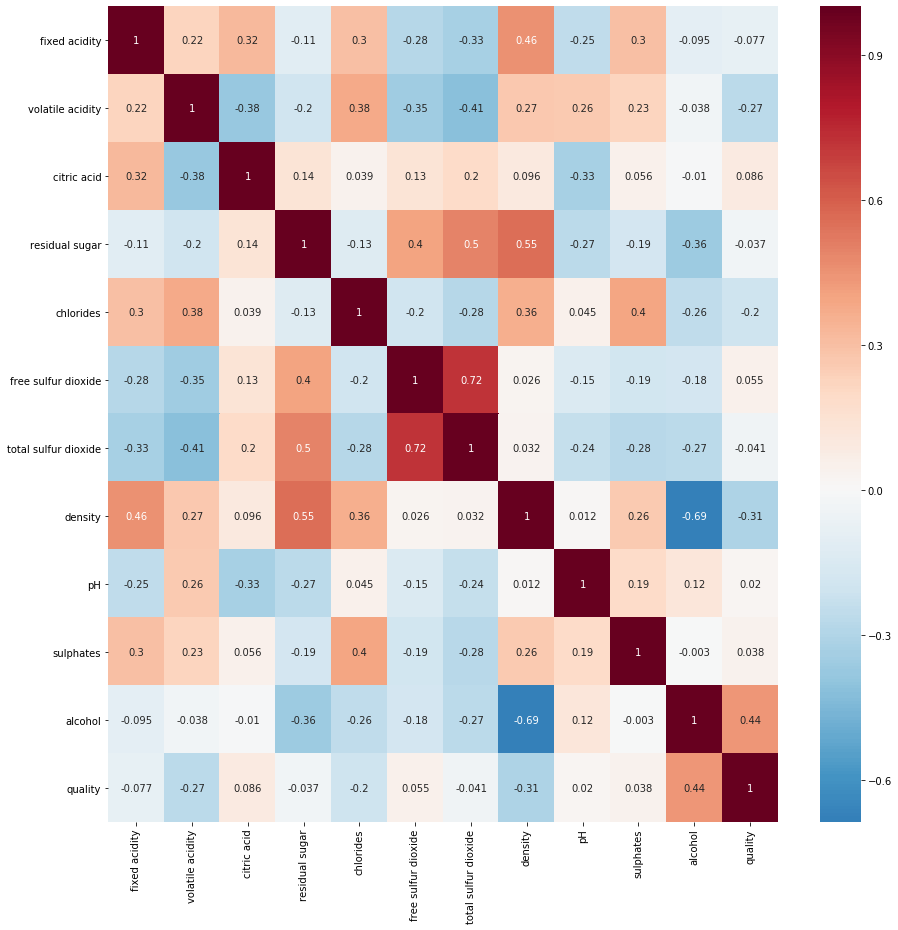

In [44]:
#set plot size
plt.figure(figsize=(15,15))

#plot heatmap of features correlation
sns.heatmap(df[columns].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.show()

### Data Preprocessing


#### Get Feature column names

In [77]:
features = list(df.columns)

#Remove target column to get data features
features.remove('quality')
features.remove('rating')

#### Get Features and Target

In [78]:
#X contains the features 
X = df[features]

#Y contains the target column
Y = df['rating']

#### Split Features and Target into test and train sets

Due to the target imbalance, I'll set stratify to Y for a more even split of different target categories

In [79]:
#we set stratify=Y because the target values are not evenly distributed
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0, stratify=Y)

### Model Training

Random forest classifier provides an argument for handling imbalance, 'class-weights' that automatically calculates weights for classes and ensures all classes have equal weights during model training. 

This argument set to 'balanced_subsample' gives the highest accuracy for our model

#### Initial Model Training

###### Fitting Random forest classification to training set

In [ ]:
RFclassifier = RandomForestClassifier( n_estimators = 100,criterion= 'entropy',class_weight='balanced_subsample')
RFclassifier.fit(X_train, Y_train)

###### Predicting Test set results

In [ ]:
Y_pred = RFclassifier.predict(X_test)

###### Evaluate model

In [80]:
print(f'Random Forest Accuracy score: {round(accuracy_score(Y_test, Y_pred),3)}')

Random Forest Accuracy score: 0.894


#### Implementing Observations to improve model performance

- Feature Scaling using sklearn standard scaler for z-score normalization

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit the scale
scaler_fit = scaler.fit(X_train)
# transformation of training data
scal_xtrain = scaler_fit.transform(X_train)
# transformation of testing data
scal_xtest = scaler_fit.transform(X_test)

In [82]:
#Fitting Random forest classification to training set
RFclassifier = RandomForestClassifier( n_estimators = 1000, criterion= 'entropy',class_weight='balanced_subsample')
RFclassifier.fit(scal_xtrain, Y_train)

# Predicting Test set results
Y_pred_scale = RFclassifier.predict(scal_xtest)

# Evaluate model
print(f'Random Forest Accuracy score: {round(accuracy_score(Y_test, Y_pred_scale),3)}')

Random Forest Accuracy score: 0.8946153846153846


#### Checking Features Importance

In [83]:
import numpy as np
importance = RFclassifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFclassifier.estimators_], axis=0)

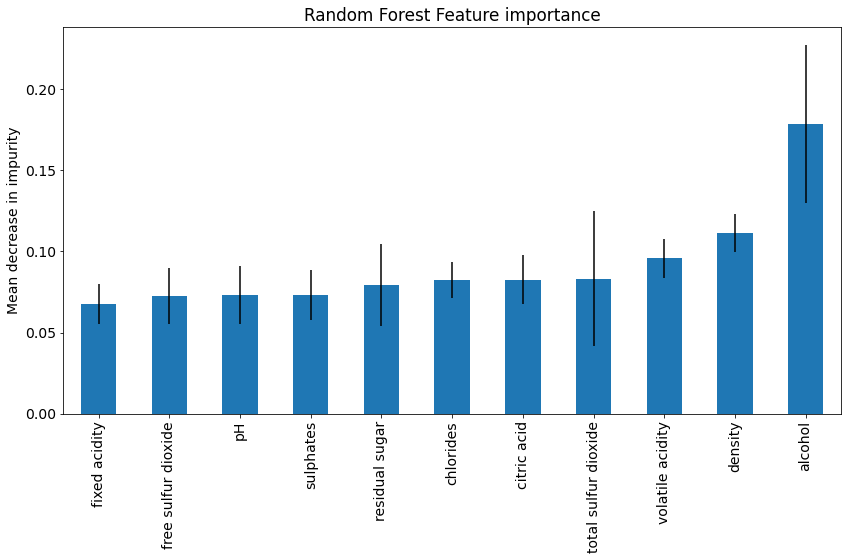

In [84]:
forest_importances = pd.Series(importance, index=features).sort_values()

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Random Forest Feature importance")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### Observation

No feature is negligible

#### Implementing Observations

- Feature Scaling + Correlated Feature reduction

##### Feature reduction

In [85]:
features_test = list(df.columns)

#Remove target column to get data features
features_test.remove('quality')
features_test.remove('rating')

#remove correlating features
features_test.remove('free sulfur dioxide')

In [86]:
#X contains the features 
X2 = df[features_test]

##### Train Test Split

In [87]:
X2_train, X2_test, Y_train, Y_test = train_test_split(X2,Y,test_size=0.2,random_state=0, stratify=Y)

##### Scaling

In [98]:
# Initialize scaler
scaler = StandardScaler()
# fit the scale
scaler_fit = scaler.fit(X2_train)
# transformation of training data
scaled_x2train = scaler_fit.transform(X2_train)
# transformation of testing data
scaled_x2test = scaler_fit.transform(X2_test)

##### Model Training, Predictions & Accuracy

###### Fitting Random forest classification to training set

In [99]:
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier(n_estimators = 1000, criterion= 'entropy',class_weight='balanced_subsample')
RFclassifier.fit(scaled_x2train, Y_train)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       n_estimators=1000)

###### Predicting Test set results

In [100]:
Y_pred = RFclassifier.predict(scaled_x2test)

##### Evaluate model

In [101]:
print(f'Random Forest Accuracy score: {round(accuracy_score(Y_test, Y_pred),3)}')

Random Forest Accuracy score: 0.901


#### Observation

Best accuracy of 0.901 is achieved after removing one of the correlated features and scaling features